In [2]:
import pandas_datareader as pdr
key="c20b16838bf7d9fda7f84d0ac1dfa404a91e06e3"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-3-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [4]:

df.to_csv('AAPL 5years.csv')

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('AAPL 5years.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-11 00:00:00+00:00,188.59,190.06,187.45,189.490,26212221,45.116563,45.468232,44.843839,45.331871,104848884,0.73,1.0
1,AAPL,2018-05-14 00:00:00+00:00,188.15,189.53,187.86,189.010,20778772,45.011301,45.341440,44.941924,45.217040,83115088,0.00,1.0
2,AAPL,2018-05-15 00:00:00+00:00,186.44,187.07,185.10,186.780,23695159,44.602216,44.752932,44.281647,44.683555,94780636,0.00,1.0
3,AAPL,2018-05-16 00:00:00+00:00,188.18,188.46,186.00,186.070,19183064,45.018478,45.085463,44.496955,44.513701,76732256,0.00,1.0
4,AAPL,2018-05-17 00:00:00+00:00,186.99,188.91,186.36,188.000,17294029,44.733793,45.193117,44.583078,44.975416,69176116,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2023-05-03 00:00:00+00:00,167.45,170.92,167.16,169.500,65136018,167.450000,170.920000,167.160000,169.500000,65136018,0.00,1.0
1253,AAPL,2023-05-04 00:00:00+00:00,165.79,167.04,164.31,164.890,81235427,165.790000,167.040000,164.310000,164.890000,81235427,0.00,1.0
1254,AAPL,2023-05-05 00:00:00+00:00,173.57,174.30,170.76,170.975,113453171,173.570000,174.300000,170.760000,170.975000,113453171,0.00,1.0
1255,AAPL,2023-05-08 00:00:00+00:00,173.50,173.85,172.11,172.480,55962793,173.500000,173.850000,172.110000,172.480000,55962793,0.00,1.0


In [7]:
import yfinance as yf
start_date = '2018-05-07' #
end_date = '2023-05-05'    #
# "start_date" must be an older date than the "end_date"

apple = yf.download(tickers = "AAPL",
                  start = start_date,
                  end = end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-07,46.294998,46.917500,46.187500,46.290001,44.129227,169805600
2018-05-08,46.247501,46.555000,45.917500,46.512501,44.341343,113611200
2018-05-09,46.637501,46.849998,46.305000,46.840000,44.653557,92844800
2018-05-10,46.935001,47.592499,46.912498,47.509998,45.292286,111957200
2018-05-11,47.372501,47.514999,46.862499,47.147499,45.120018,104848800
...,...,...,...,...,...,...
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.679993,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700


In [9]:
df1=df.reset_index()['close'] #defining df1
df1

0       188.59
1       188.15
2       186.44
3       188.18
4       186.99
         ...  
1252    167.45
1253    165.79
1254    173.57
1255    173.50
1256    171.77
Name: close, Length: 1257, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
scaler = MinMaxScaler()
df['close'] = scaler.fit_transform(df['close'].values.reshape(-1,1))

In [12]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [13]:
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[(i + time_steps), 0])
    return np.array(X), np.array(y)

In [14]:
time_steps = 30
X_train, y_train = create_dataset(train_data[['close']].values, time_steps)
X_test, y_test = create_dataset(test_data[['close']].values, time_steps)

In [15]:
model = Sequential()
model.add(Dense(64, input_shape=(time_steps,)))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:

model.fit(X_train, y_train, epochs=45, batch_size=64)

Epoch 1/45
16/16 [==============================] - 2s 2ms/step - loss: 0.7165
Epoch 2/45
16/16 [==============================] - 0s 2ms/step - loss: 0.1476
Epoch 3/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 4/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 5/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 6/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 7/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0363
Epoch 8/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 9/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 10/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 11/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 12/45
16/16 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 13/45
16/16 [==============================

In [18]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, np.sqrt(train_score)))
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, np.sqrt(test_score)))

Train Score: 0.00 MSE (0.04 RMSE)
Test Score: 0.00 MSE (0.01 RMSE)


In [19]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [20]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [21]:
train_predict

array([[189.59457 ],
       [188.11711 ],
       [188.89581 ],
       [188.86125 ],
       [189.30045 ],
       [188.36867 ],
       [189.42291 ],
       [189.18704 ],
       [190.55252 ],
       [192.20134 ],
       [193.95847 ],
       [193.56648 ],
       [192.40614 ],
       [194.52725 ],
       [195.6706  ],
       [196.59747 ],
       [194.79028 ],
       [195.30717 ],
       [195.44362 ],
       [196.02902 ],
       [195.91603 ],
       [195.98567 ],
       [197.40097 ],
       [196.59692 ],
       [195.70929 ],
       [195.04524 ],
       [194.99481 ],
       [201.39954 ],
       [204.90674 ],
       [207.07101 ],
       [206.44243 ],
       [210.2839  ],
       [212.55113 ],
       [212.39153 ],
       [210.96667 ],
       [210.14879 ],
       [213.79306 ],
       [214.44756 ],
       [214.26848 ],
       [215.49072 ],
       [215.53952 ],
       [216.36124 ],
       [216.89484 ],
       [219.50674 ],
       [219.60956 ],
       [220.87173 ],
       [220.63481 ],
       [219.6

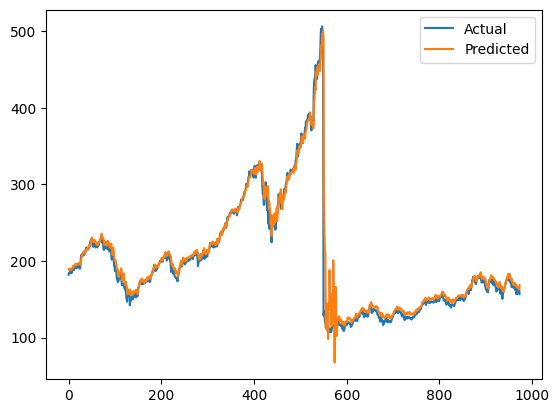

In [22]:
# Plot the predictions
import matplotlib.pyplot as plt
plt.plot(y_train[0], label='Actual')
plt.plot(train_predict[:,0], label='Predicted')
plt.legend()
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
aapl=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

0       188.59
1       188.15
2       186.44
3       188.18
4       186.99
         ...  
1252    167.45
1253    165.79
1254    173.57
1255    173.50
1256    171.77
Name: close, Length: 1257, dtype: float64


In [25]:
training_size=int(len(df)*0.8) 
test_size=len(df)-training_size
train_data, test_data=df.iloc[0:training_size,:],df.iloc[training_size:len(df),:1]

In [26]:
training_size,test_size

(1005, 252)

In [27]:
train_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-11 00:00:00+00:00,0.204759,190.06,187.45,189.49,26212221,45.116563,45.468232,44.843839,45.331871,104848884,0.73,1.0
1,AAPL,2018-05-14 00:00:00+00:00,0.203657,189.53,187.86,189.01,20778772,45.011301,45.341440,44.941924,45.217040,83115088,0.00,1.0
2,AAPL,2018-05-15 00:00:00+00:00,0.199374,187.07,185.10,186.78,23695159,44.602216,44.752932,44.281647,44.683555,94780636,0.00,1.0
3,AAPL,2018-05-16 00:00:00+00:00,0.203732,188.46,186.00,186.07,19183064,45.018478,45.085463,44.496955,44.513701,76732256,0.00,1.0
4,AAPL,2018-05-17 00:00:00+00:00,0.200751,188.91,186.36,188.00,17294029,44.733793,45.193117,44.583078,44.975416,69176116,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,AAPL,2022-05-02 00:00:00+00:00,0.128040,158.23,153.27,156.71,123055265,157.009748,157.278124,152.347962,155.767268,123055265,0.00,1.0
1001,AAPL,2022-05-03 00:00:00+00:00,0.131847,160.71,156.32,158.15,88966526,158.520604,159.743205,155.379614,157.198605,88966526,0.00,1.0
1002,AAPL,2022-05-04 00:00:00+00:00,0.148228,166.48,159.26,159.67,107521649,165.021261,165.478494,158.301928,158.709461,107521649,0.00,1.0
1003,AAPL,2022-05-05 00:00:00+00:00,0.125059,164.08,154.95,163.85,130525275,155.826907,163.092931,154.017856,162.864315,130525275,0.00,1.0


In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
time_steps = 30
X_train, y_train = create_dataset(train_data.values, time_steps)
X_test, y_test = create_dataset(test_data.values, time_steps)

In [30]:
print(X_train.shape), print(y_train.shape)

(974, 30)
(974,)


(None, None)

In [31]:
print(X_test.shape), print(y_train.shape)

(221, 30)
(974,)


(None, None)

In [32]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])

In [33]:
X_train

array([['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL'],
       ['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL'],
       ['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL'],
       ...,
       ['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL'],
       ['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL'],
       ['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL']],
      dtype=object)

In [34]:
train_predict = np.reshape(train_predict, (len(train_predict), 1))

In [35]:
combined_train_data = np.concatenate((X_train, train_predict), axis=1)

In [39]:
#building model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])


In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 50,853
Trainable params: 50,853
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(combined_train_data,validation_data=(combined_test_data),epochs=40,batch_size=64,verbose=1)

Epoch 1/40
74/74 [==============================] - 23s 218ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 2/40
74/74 [==============================] - 15s 200ms/step - loss: 1.9133e-04 - val_loss: 0.0026
Epoch 3/40
74/74 [==============================] - 15s 203ms/step - loss: 1.8493e-04 - val_loss: 0.0020
Epoch 4/40
74/74 [==============================] - 16s 209ms/step - loss: 1.8787e-04 - val_loss: 0.0014
Epoch 5/40
74/74 [==============================] - 15s 200ms/step - loss: 1.7674e-04 - val_loss: 0.0011
Epoch 6/40
74/74 [==============================] - 15s 200ms/step - loss: 1.6148e-04 - val_loss: 0.0015
Epoch 7/40
74/74 [==============================] - 16s 210ms/step - loss: 1.7871e-04 - val_loss: 9.9471e-04
Epoch 8/40
74/74 [==============================] - 15s 200ms/step - loss: 1.5662e-04 - val_loss: 0.0012
Epoch 9/40
74/74 [==============================] - 16s 214ms/step - loss: 2.0540e-04 - val_loss: 0.0019
Epoch 10/40
74/74 [==============================] - 15

In [42]:
test_predict = np.reshape(test_predict, (len(test_predict), 1))

In [43]:
combined_test_data = np.concatenate((X_test,test_predict), axis=1)

In [44]:
len(combined_test_data)

221

In [45]:
import tensorflow as tf


In [ ]:
train_predict=model.predict(combined_train_data)
test_predict=model.predict(combined_test_data)


In [ ]:
train_predict= scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
len(combined_test_data)

221

In [ ]:
x_input=combined_test_data[121:].reshape(1,-1) #taken dat afrome previous 100 days and reshaped it into 0 aand 1
x_input.shape

(1, 3100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 144.97132873535156,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825

In [ ]:
import matplotlib.pyplot as plt

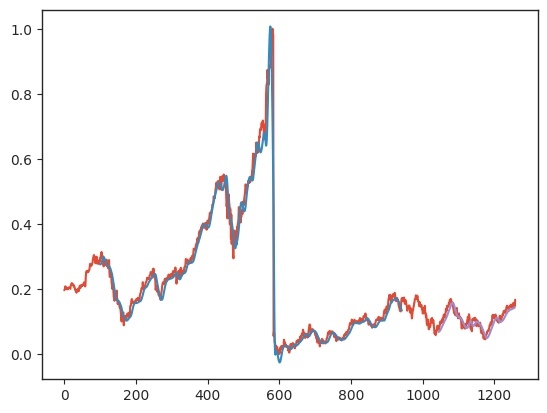

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#  prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.14537571]
101
1 day input [0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

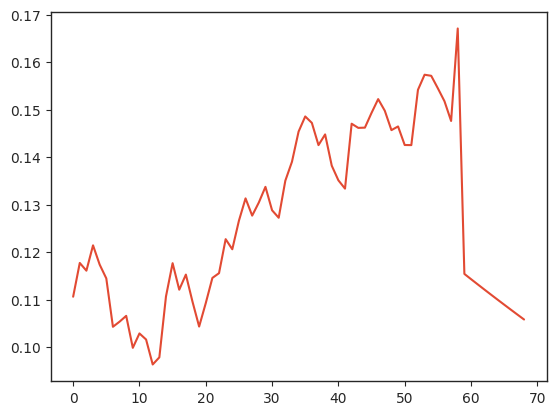

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

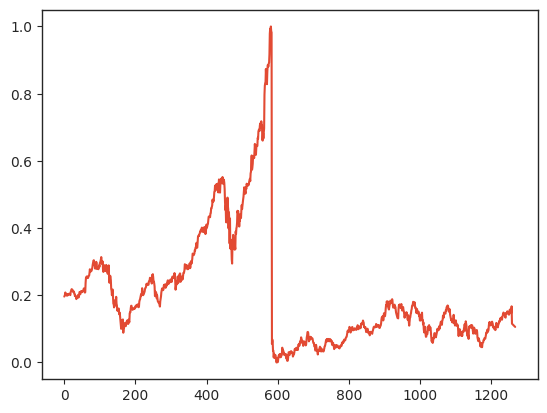

In [ ]:
plt.plot(df3)